<a href="https://colab.research.google.com/github/Sree-13/22-07-2023_dataset/blob/main/Sales_rate_United_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATA PREPARATION AND CLEANING

In [3]:
data  = pd.read_csv("/train.csv")
data


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


**FINDING THE SHAPE OF THE DATASET**

In [4]:
data.shape

(9800, 18)

In [5]:
print("Number of rows: ",data.shape[0] )
print("Number of col: ",data.shape[1] )

Number of rows:  9800
Number of col:  18


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

**FINDING THE NULL VALUES**

In [7]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

**FINDING DUPLICATE VALUES**

In [8]:
data_dup = data.duplicated().any()
print(data_dup)

False


**OVERALL STATISTICS OF THE DATASET**

In [9]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


**CLEANING DATA**

In [10]:
data = data.drop(columns = ["Postal Code"])

**FINDING CORREALTION**

In [11]:
data.corr()

<ipython-input-11-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Row ID,Sales
Row ID,1.000000,0.001151
Sales,0.001151,1.000000


# VISUALISATION

**REGION BASED ANALYSIS**

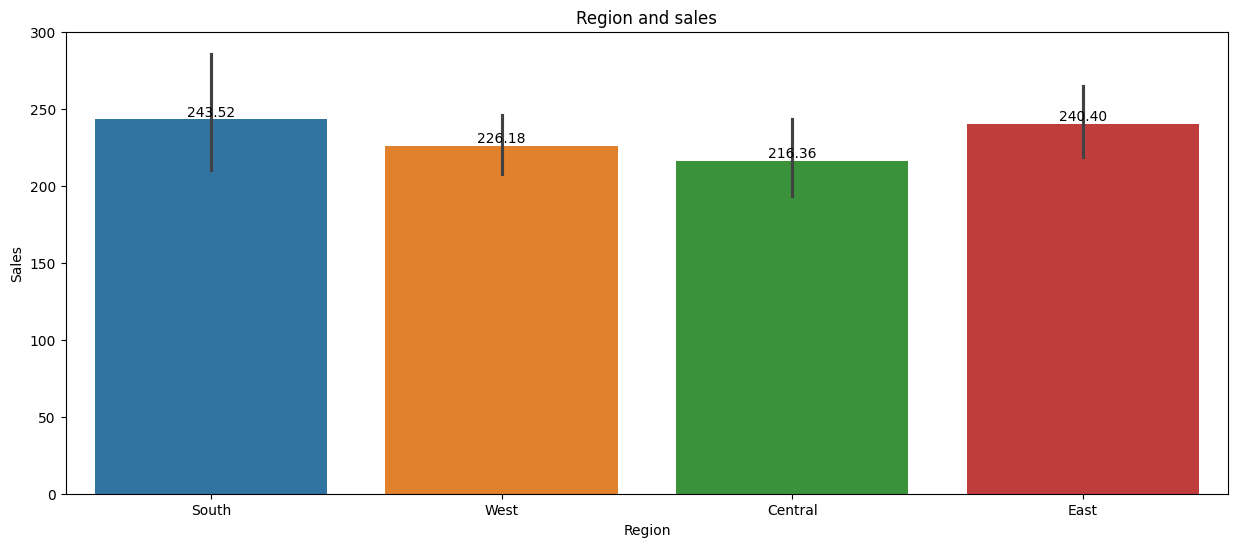

In [12]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=data['Region'], y=data['Sales'], hue=data['Region'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Region and sales")
plt.show()

# **SALES ANALYSIS IN CENTRAL REGION**

In [13]:
data_central = data[data['Region'] == 'Central']

**SALES IN EACH STATE**

Text(0, 0.5, 'Sales')

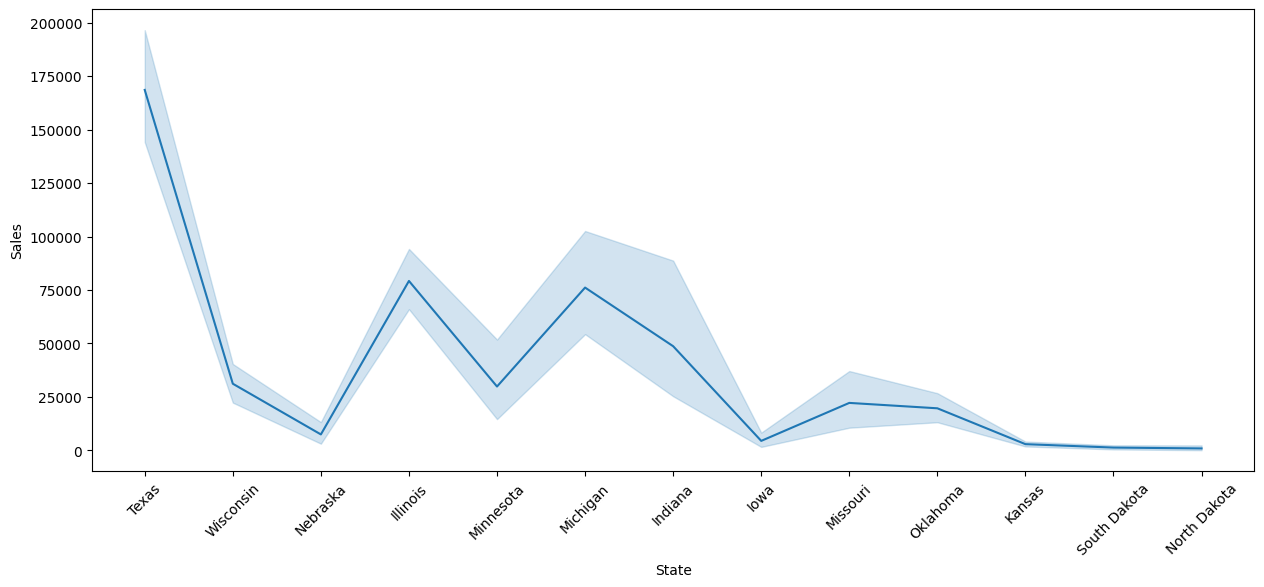

In [14]:
plt.figure(figsize = (15,6))
sns.lineplot(x='State', y='Sales', data=data_central, estimator=sum)
plt.xlabel("State")
plt.xticks(rotation = 45)
plt.ylabel("Sales")

**SEGMENT IN TEXAS**

In [15]:
data_texas = data[data['State'] == "Texas"]

**Sales Distribution by Segment in Texas Region**

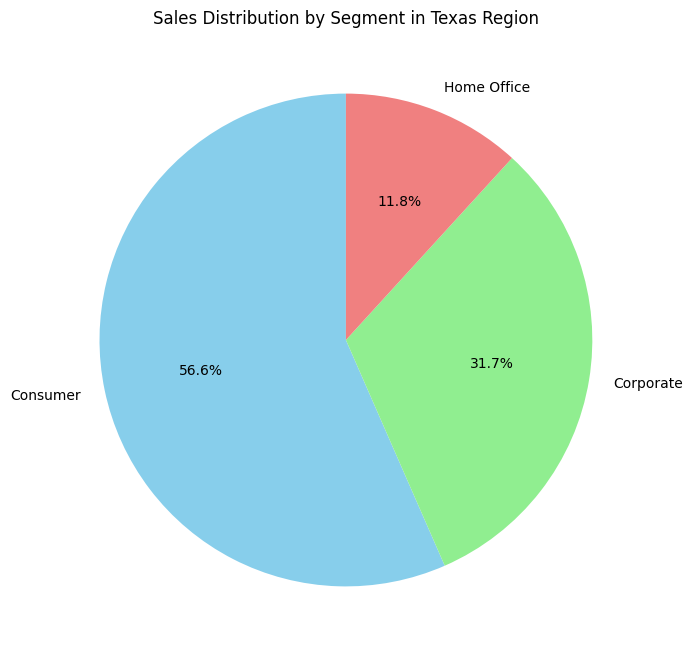

In [16]:
sales_by_segment = data_texas.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_segment, labels=sales_by_segment.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightpink'])
plt.title('Sales Distribution by Segment in Texas Region')
plt.show()

**Sales distribution on Consumer , Corporate and Home Office Categories in Texas**

In [17]:
data_texas_segment_consumer = data[(data['State'] == 'Texas') & (data['Segment'] == 'Consumer')]
data_texas_segment_homeoffice= data[(data['State'] == 'Texas') & (data['Segment'] == 'Home Office')]
data_texas_segment_corporate = data[(data['State'] == 'Texas') & (data['Segment'] == 'Corporate')]

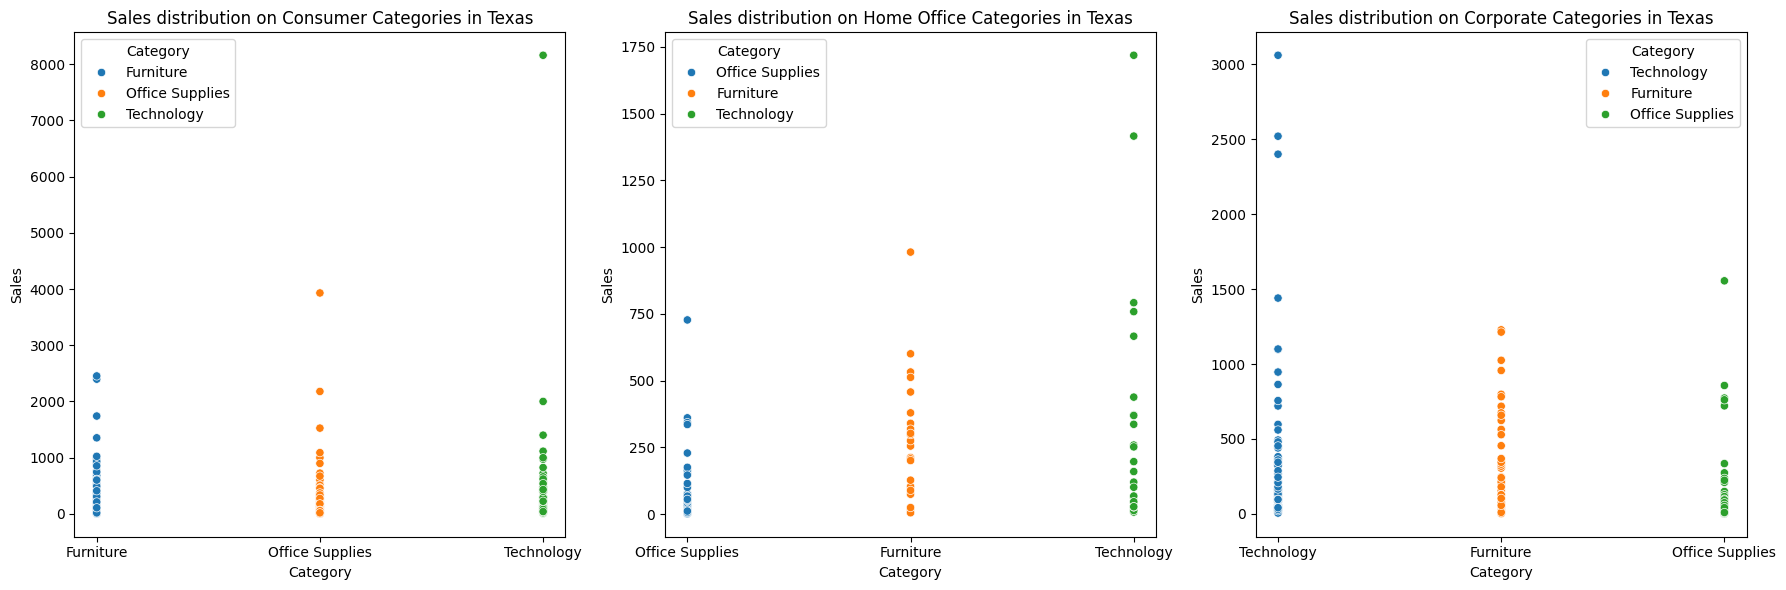

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(ax=axes[0], x=data_texas_segment_consumer["Category"], y=data_texas_segment_consumer["Sales"], hue=data_texas_segment_consumer["Category"])
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Sales")
axes[0].set_title("Sales distribution on Consumer Categories in Texas")

sns.scatterplot(ax=axes[1], x=data_texas_segment_homeoffice["Category"], y=data_texas_segment_homeoffice["Sales"], hue=data_texas_segment_homeoffice["Category"])
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Sales")
axes[1].set_title("Sales distribution on Home Office Categories in Texas")

sns.scatterplot(ax=axes[2], x=data_texas_segment_corporate["Category"], y=data_texas_segment_corporate["Sales"], hue=data_texas_segment_corporate["Category"])
axes[2].set_xlabel("Category")
axes[2].set_ylabel("Sales")
axes[2].set_title("Sales distribution on Corporate Categories in Texas")

plt.tight_layout()

plt.show()

**SEGMENT IN SOUTH DAKOTA**

In [19]:
data_south_dakota = data[data['State'] == "South Dakota"]

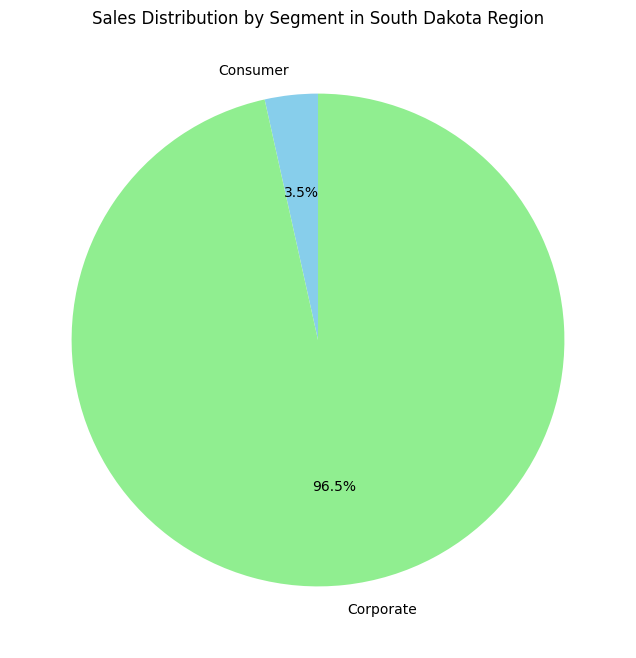

In [20]:
sales_by_segment = data_south_dakota.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_segment, labels=sales_by_segment.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightpink'])
plt.title('Sales Distribution by Segment in South Dakota Region')
plt.show()

**Sales distribution on Consumer and Corporate Category in Texas**

In [21]:
data_south_dakota_segment_consumer = data[(data['State'] == 'South Dakota') & (data['Segment'] == 'Consumer')]
data_south_dakota_segment_corporate= data[(data['State'] == 'South Dakota') & (data['Segment'] == 'Corporate')]

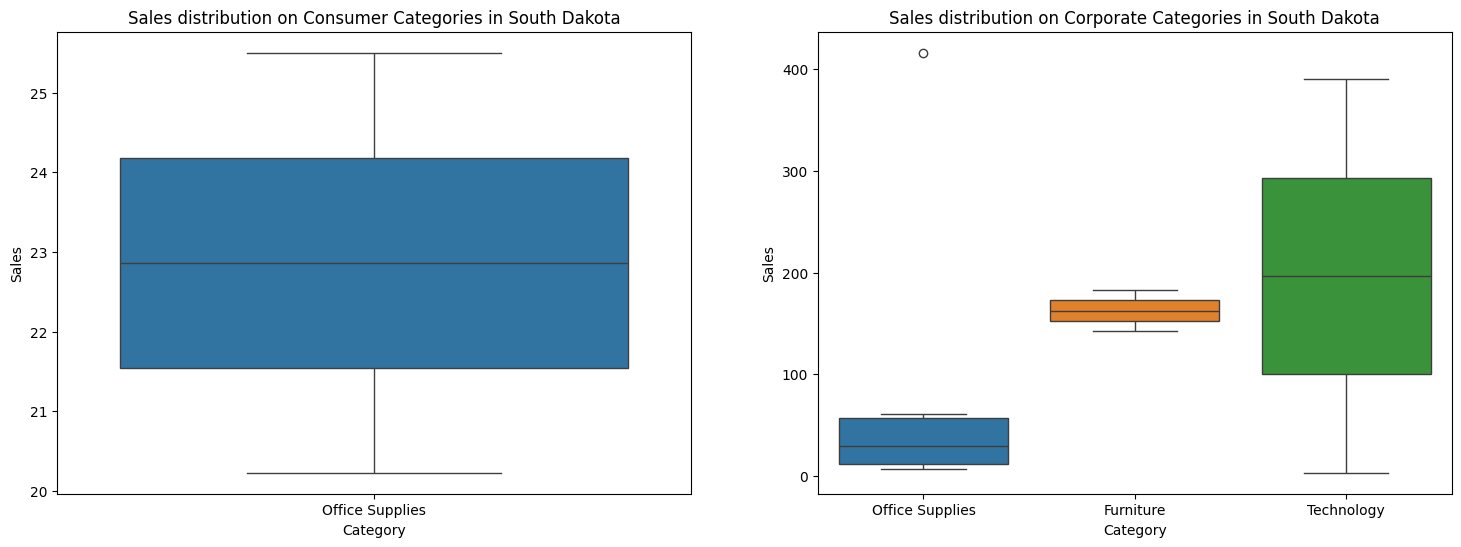

<Figure size 640x480 with 0 Axes>

In [22]:
fig, axes = plt.subplots(1,2 , figsize=(18, 6))
sns.boxplot(ax=axes[0],x = data_south_dakota_segment_consumer["Category"] , y=data_south_dakota_segment_consumer["Sales"], hue = data_south_dakota_segment_consumer["Category"])
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Sales")
axes[0].set_title("Sales distribution on Consumer Categories in South Dakota")

sns.boxplot(ax=axes[1],x = data_south_dakota_segment_corporate["Category"] , y=data_south_dakota_segment_corporate["Sales"], hue = data_south_dakota_segment_corporate["Category"])
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Sales")
axes[1].set_title("Sales distribution on Corporate Categories in South Dakota")
plt.show()

plt.tight_layout()
plt.show()

# **SALES ANALYSIS IN WEST REGION**

In [23]:
data_west = data[data['Region'] == 'West']

**SALES IN EACH STATE**

Text(0, 0.5, 'Sales')

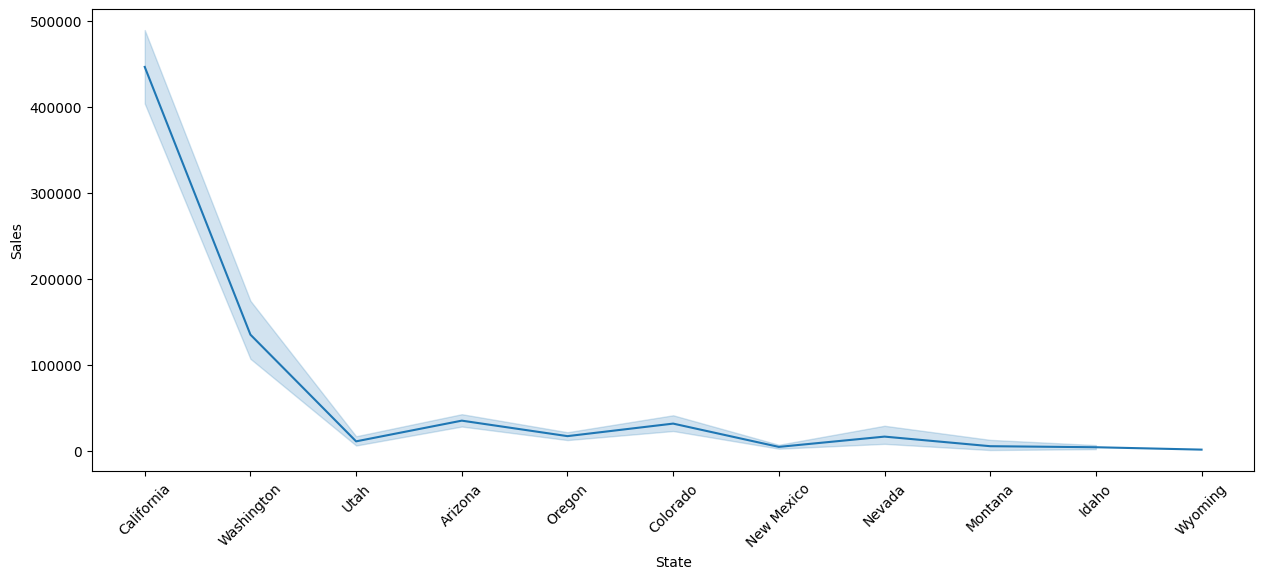

In [24]:
plt.figure(figsize = (15,6))
sns.lineplot(x='State', y='Sales', data=data_west, estimator=sum)
plt.xlabel("State")
plt.xticks(rotation = 45)
plt.ylabel("Sales")

**SEGMENT IN CALIFORNIA**

In [25]:
data_California = data[data['State'] == "California"]

**SALES SEGMENTATION IN CALIFORNIA**

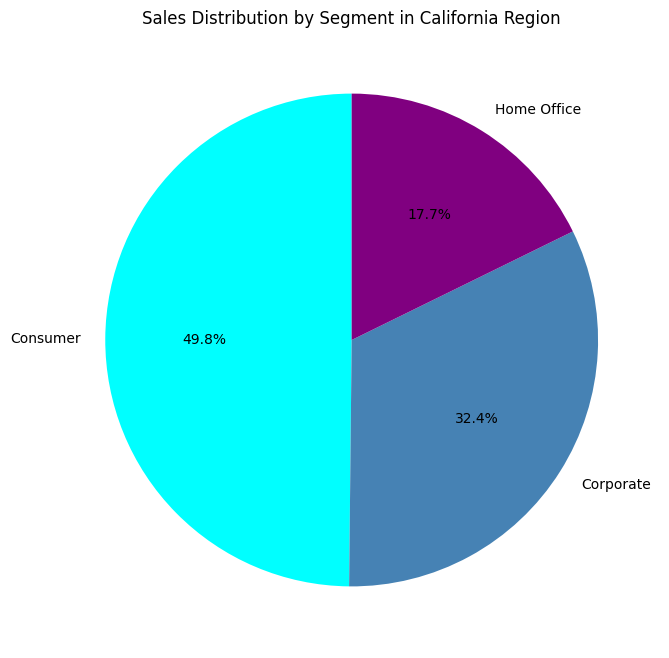

In [26]:
sales_by_segment_west = data_California.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_segment_west, labels=sales_by_segment_west.index, autopct='%1.1f%%', startangle=90, colors=['cyan', 'steelblue', 'purple'])
plt.title('Sales Distribution by Segment in California Region')
plt.show()

**Sales distribution on Consumer,Corporate and Home Office Category in California**

In [27]:
data_california_segment_Corporate= data[(data['State'] == 'California') & (data['Segment'] == 'Corporate')]
data_california_segment_home= data[(data['State'] == 'California') & (data['Segment'] == 'Home Office')]
data_california_segment_consumer= data[(data['State'] == 'California') & (data['Segment'] == 'Consumer')]

In [28]:
palette = sns.color_palette("rocket")

<ipython-input-29-31087bb037b0>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(ax = axes[0],x = data_california_segment_consumer["Category"] , y=data_california_segment_consumer["Sales"], hue = data_california_segment_consumer["Category"], palette=palette)
<ipython-input-29-31087bb037b0>:9: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(ax = axes[1],x = data_california_segment_Corporate["Category"] , y=data_california_segment_Corporate["Sales"], hue = data_california_segment_Corporate["Category"], palette=palette)
<ipython-input-29-31087bb037b0>:15: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(ax = axes[2],x = data_california_segment_home["Category"] , y=data_california_segment_home["Sales"], hue = data_california_segment_home["Category"], palette=palette)


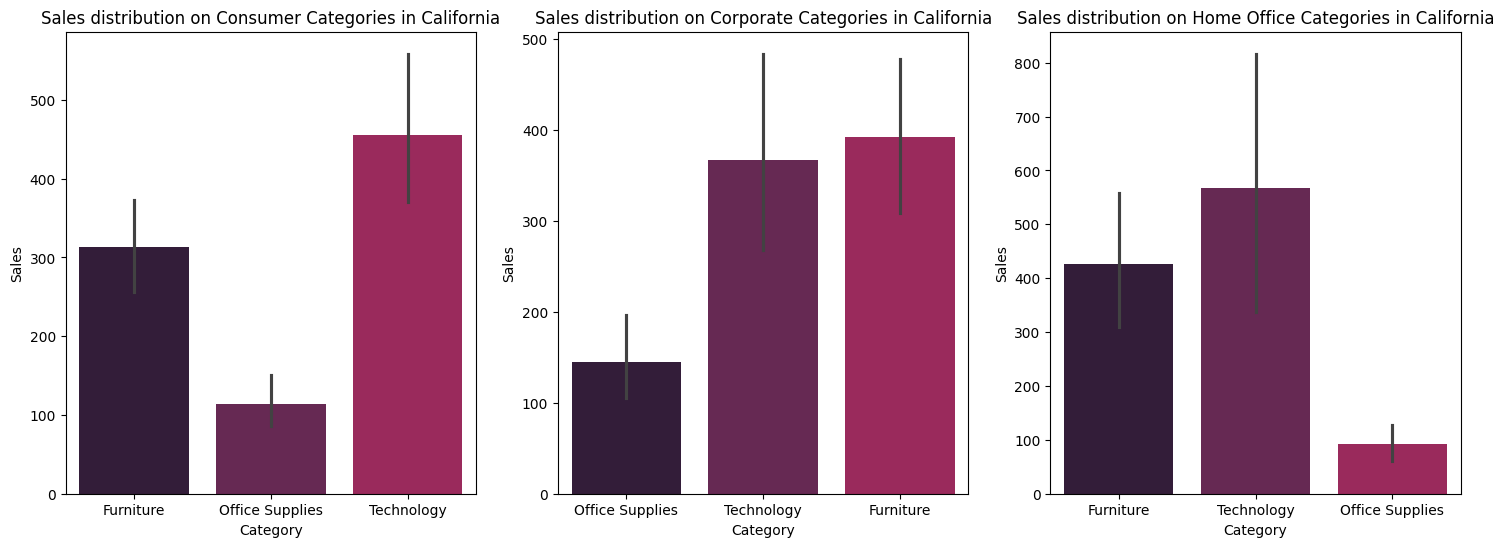

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [29]:
fig, axes = plt.subplots(1,3, figsize = (18,6))

plt.figure(figsize = (15,6))
sns.barplot(ax = axes[0],x = data_california_segment_consumer["Category"] , y=data_california_segment_consumer["Sales"], hue = data_california_segment_consumer["Category"], palette=palette)
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Sales")
axes[0].set_title("Sales distribution on Consumer Categories in California")

sns.barplot(ax = axes[1],x = data_california_segment_Corporate["Category"] , y=data_california_segment_Corporate["Sales"], hue = data_california_segment_Corporate["Category"], palette=palette)
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Sales")
axes[1].set_title("Sales distribution on Corporate Categories in California")

plt.figure(figsize = (15,6))
sns.barplot(ax = axes[2],x = data_california_segment_home["Category"] , y=data_california_segment_home["Sales"], hue = data_california_segment_home["Category"], palette=palette)
axes[2].set_xlabel("Category")
axes[2].set_ylabel("Sales")
axes[2].set_title("Sales distribution on Home Office Categories in California")


plt.tight_layout()
plt.show()

**SALES DISTRIBUTION IN WYOMING**

In [30]:
data_wm = data[data['State'] == "Wyoming"]

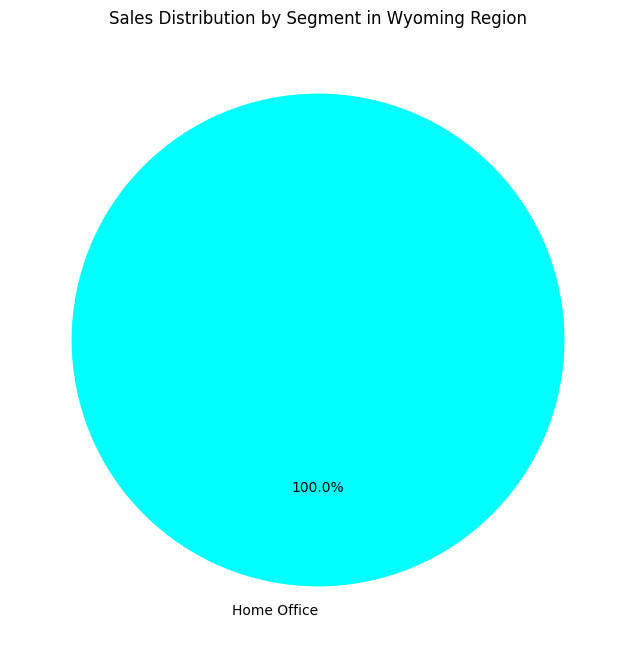

In [31]:
sales_by_segment_west_v = data_wm.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_segment_west_v, labels=sales_by_segment_west_v.index, autopct='%1.1f%%', startangle=90, colors=['cyan', 'steelblue', 'purple'])
plt.title('Sales Distribution by Segment in Wyoming Region')
plt.show()

**Sales distribution on Consumer and House Office in Wyoming**

In [32]:
data_wv_segment_ho= data[(data['State'] == 'Wyoming') & (data['Segment'] == 'Home Office')]

<ipython-input-33-81160daaa2c0>:3: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.barplot(x = data_wv_segment_ho["Category"] , y=data_wv_segment_ho["Sales"], hue =data_wv_segment_ho["Category"], palette=palette)


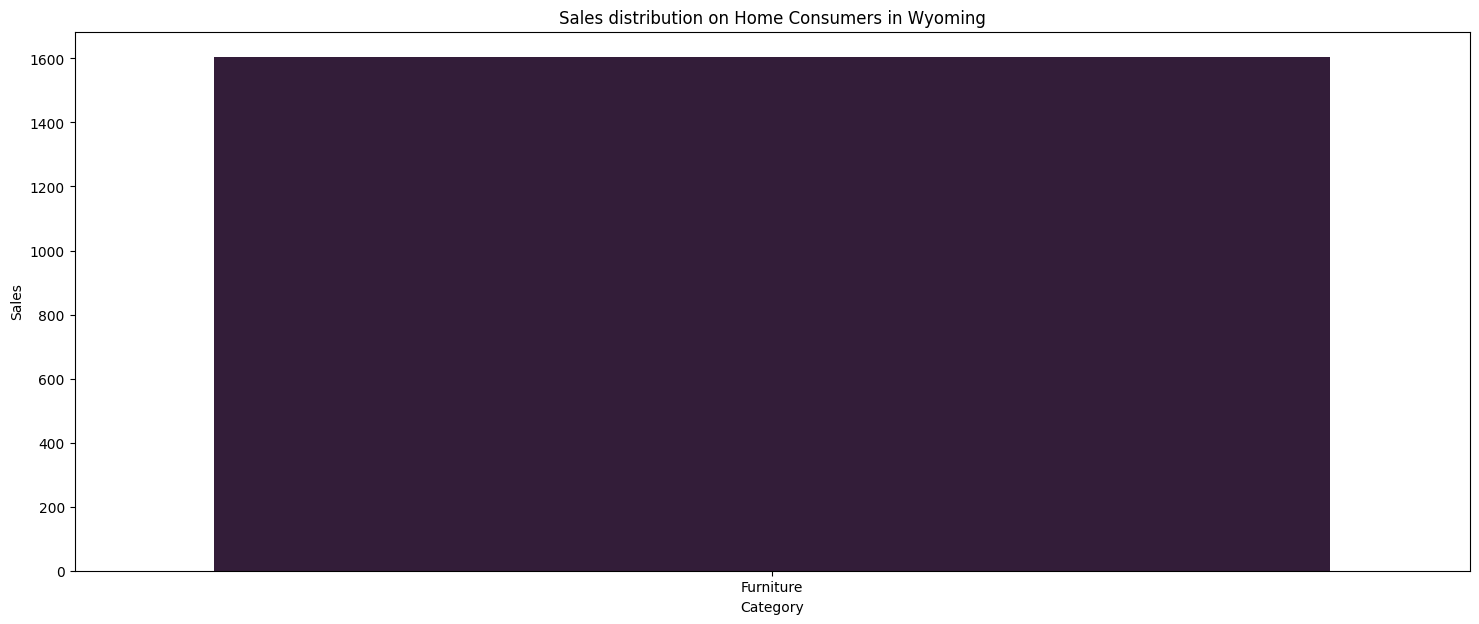

In [33]:
plt.figure(figsize=(18,7))

sns.barplot(x = data_wv_segment_ho["Category"] , y=data_wv_segment_ho["Sales"], hue =data_wv_segment_ho["Category"], palette=palette)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.title("Sales distribution on Home Consumers in Wyoming")

plt.show()

# **SALES ANALYSIS IN EAST REGION**

**SALES IN EACH STATE**

In [34]:
data_east = data[data['Region'] == 'East']

Text(0, 0.5, 'Sales')

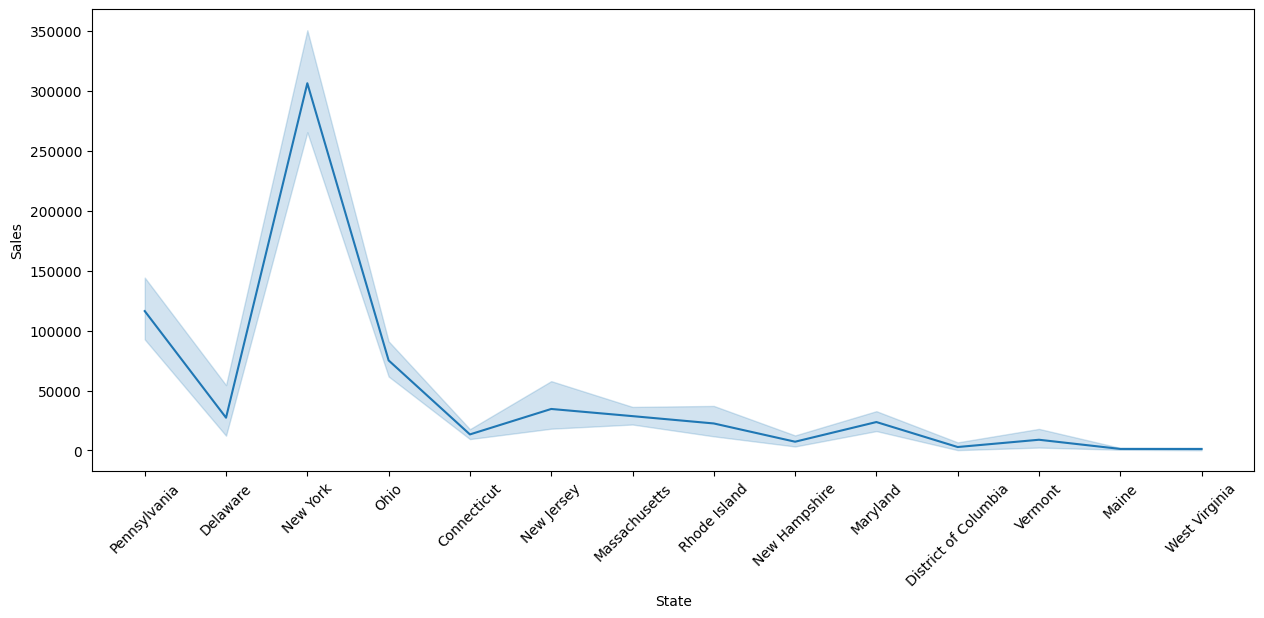

In [35]:
plt.figure(figsize = (15,6))
sns.lineplot(x='State', y='Sales', data=data_east, estimator=sum)
plt.xlabel("State")
plt.xticks(rotation = 45)
plt.ylabel("Sales")

**SEGMENTATION IN NEW YORK**

In [36]:
data_NY = data[data['State'] == "New York"]

**SALES SEGMENTATION IN NEW YORK**

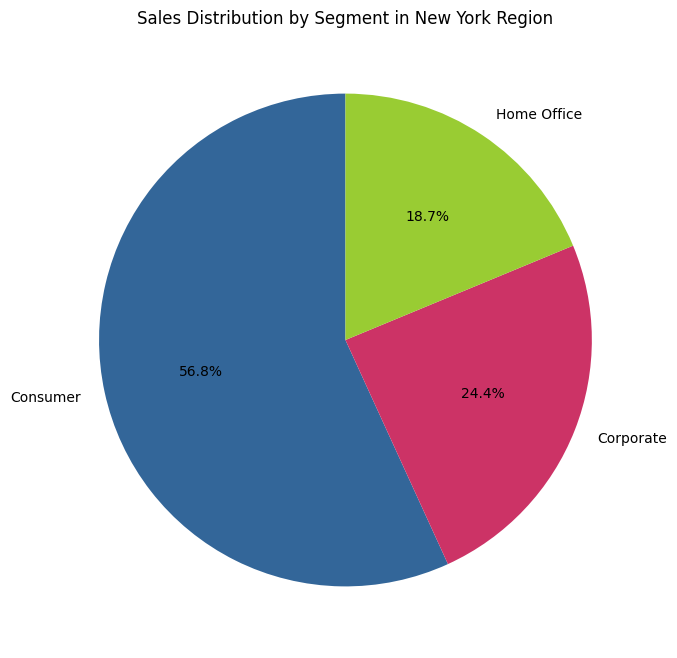

In [37]:
sales_by_segment_east = data_NY.groupby('Segment')['Sales'].sum()
colors = [(0.2, 0.4, 0.6),
          (0.8, 0.2, 0.4),
          (0.6, 0.8, 0.2)]
plt.figure(figsize=(8, 8))
plt.pie(sales_by_segment_east, labels=sales_by_segment_east.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sales Distribution by Segment in New York Region')
plt.show()

**Sales distribution on Consumer, Corporate and Home Office Category in New York**

In [38]:
data_ny_segment_consumer= data[(data['State'] == 'California') & (data['Segment'] == 'Consumer')]
data_ny_segment_cor= data[(data['State'] == 'California') & (data['Segment'] == 'Corporate')]
data_ny_segment_ho= data[(data['State'] == 'California') & (data['Segment'] == 'Home Office')]

In [39]:
palette = sns.color_palette("pastel")

<ipython-input-40-4ac81d3ed8f8>:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(ax = axes[0],x = data_ny_segment_consumer["Category"] , y=data_ny_segment_consumer["Sales"], hue = data_ny_segment_consumer["Category"], palette=palette)
<ipython-input-40-4ac81d3ed8f8>:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(ax = axes[1],x = data_ny_segment_cor["Category"] , y = data_ny_segment_cor["Sales"] , hue = data_ny_segment_cor["Category"], palette = palette)
<ipython-input-40-4ac81d3ed8f8>:12: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(ax= axes[2],x = data_ny_segment_ho["Category"] , y = data_ny_segment_ho["Sales"] , hue = data_ny_segment_ho["Category"], palette = palette)


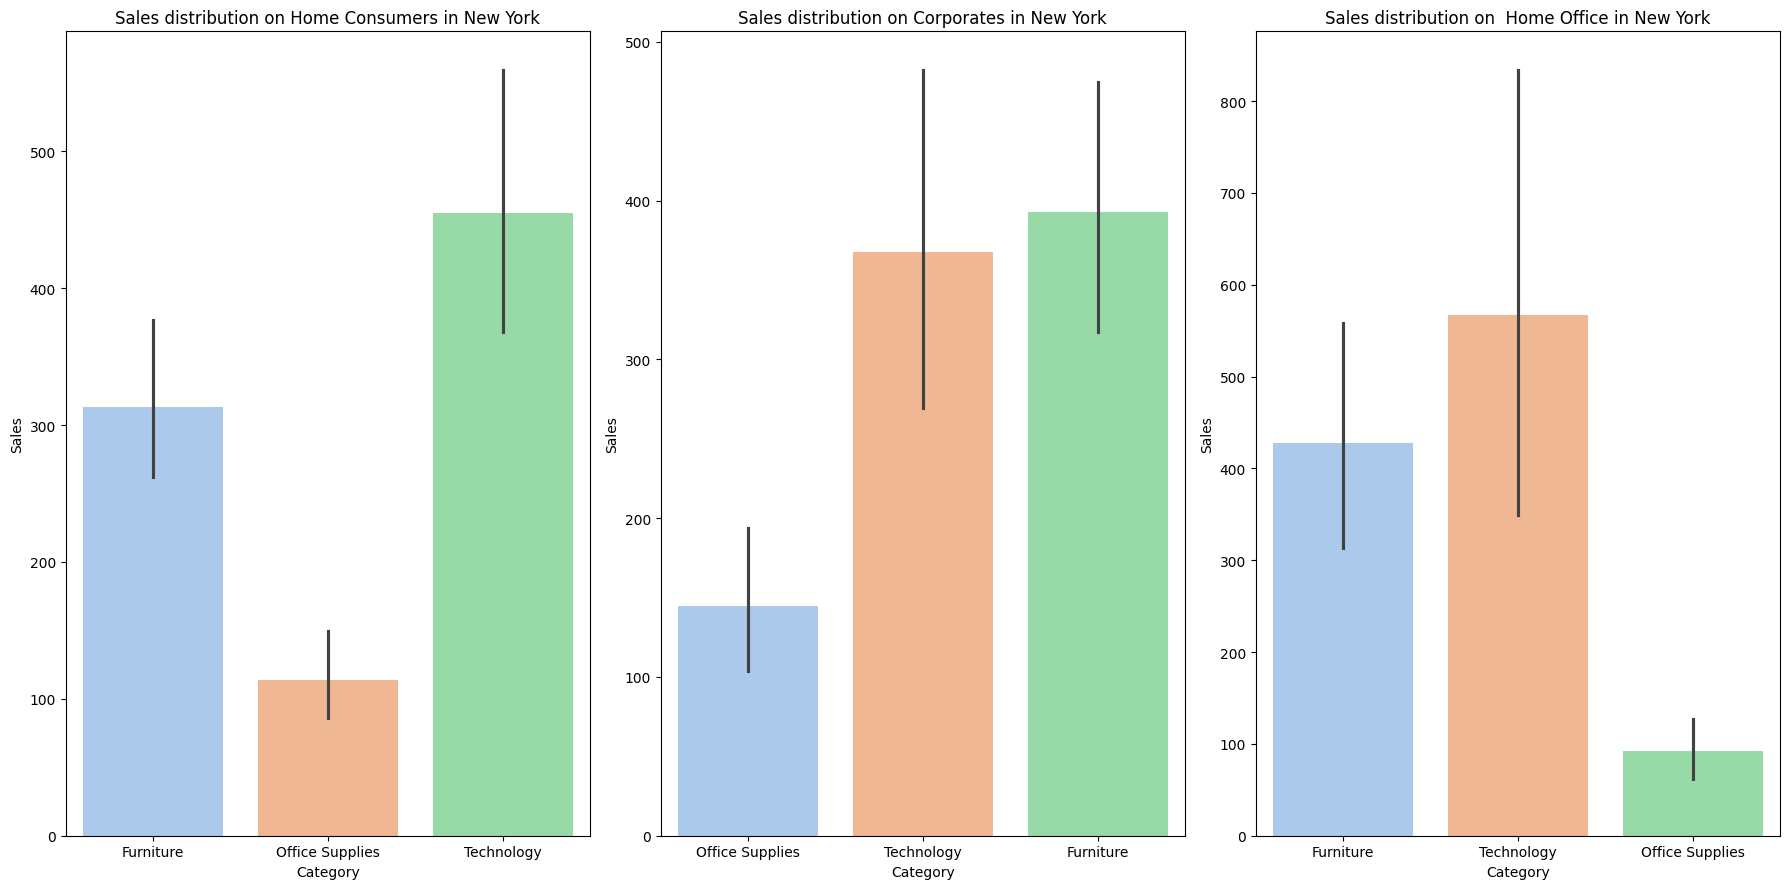

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 9))
sns.barplot(ax = axes[0],x = data_ny_segment_consumer["Category"] , y=data_ny_segment_consumer["Sales"], hue = data_ny_segment_consumer["Category"], palette=palette)
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Sales")
axes[0].set_title("Sales distribution on Home Consumers in New York")

sns.barplot(ax = axes[1],x = data_ny_segment_cor["Category"] , y = data_ny_segment_cor["Sales"] , hue = data_ny_segment_cor["Category"], palette = palette)
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Sales")
axes[1].set_title("Sales distribution on Corporates in New York")

sns.barplot(ax= axes[2],x = data_ny_segment_ho["Category"] , y = data_ny_segment_ho["Sales"] , hue = data_ny_segment_ho["Category"], palette = palette)
axes[2].set_xlabel("Category")
axes[2].set_ylabel("Sales")
axes[2].set_title("Sales distribution on  Home Office in New York")

plt.tight_layout()
plt.show()

**Sales and Segmentation in West Virginia**

In [41]:
data_wv = data[data['State'] == "West Virginia"]

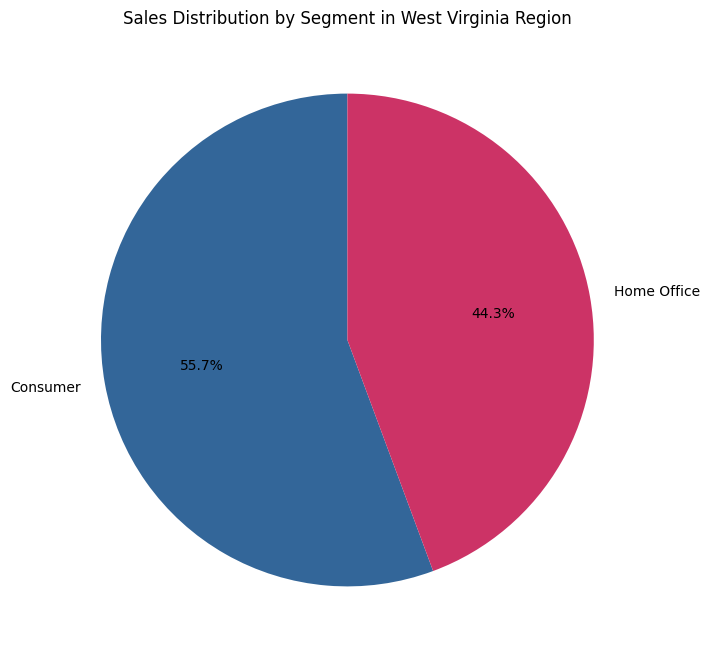

In [42]:
sales_by_segment_east_wv = data_wv.groupby('Segment')['Sales'].sum()
colors = [(0.2, 0.4, 0.6),
          (0.8, 0.2, 0.4),
          (0.6, 0.8, 0.2)]
plt.figure(figsize=(8, 8))
plt.pie(sales_by_segment_east_wv, labels=sales_by_segment_east_wv.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sales Distribution by Segment in West Virginia Region')
plt.show()

**Sales distribution on Consumer Category in West Virginia**

In [43]:
data_wv_segment_con= data[(data['State'] == 'West Virginia') & (data['Segment'] == 'Consumer')]
data_wv_segment_ho= data[(data['State'] == 'West Virginia') & (data['Segment'] == 'Home Office')]

<ipython-input-44-f8e8433efebd>:2: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.barplot(ax = axes[0],x = data_wv_segment_con["Category"] , y =data_wv_segment_con["Sales"] , hue = data_wv_segment_con["Category"], palette = palette)
<ipython-input-44-f8e8433efebd>:7: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.barplot(ax = axes[1], x= data_wv_segment_ho["Category"] , y =data_wv_segment_ho["Sales"] , hue = data_wv_segment_ho["Category"], palette = palette)


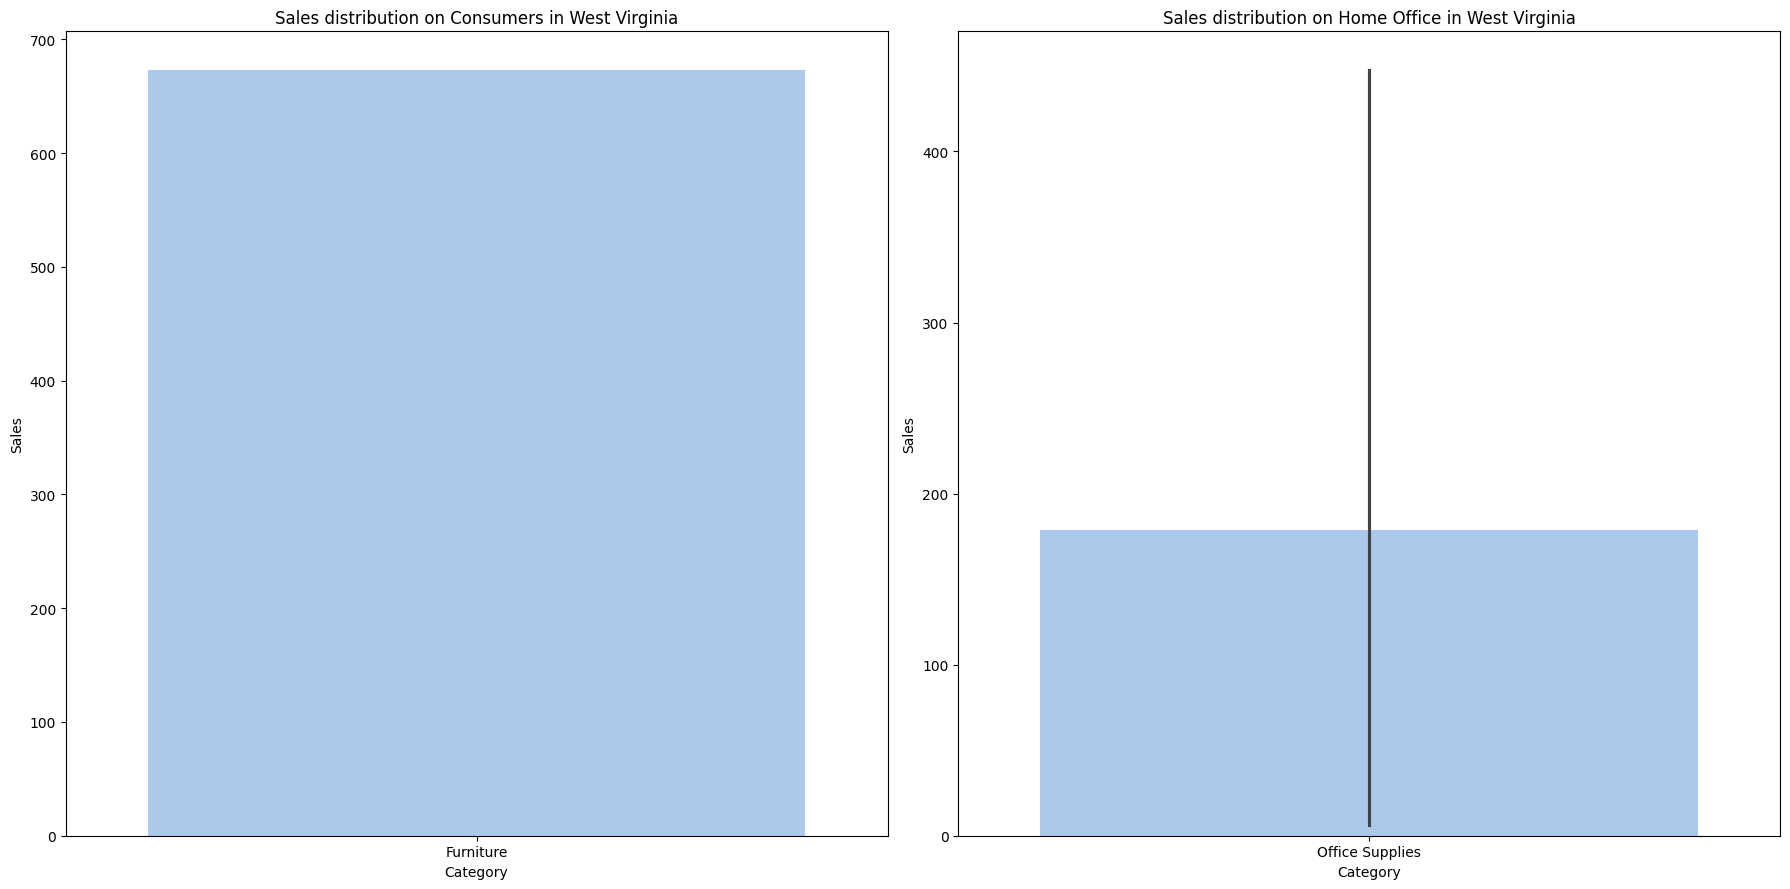

In [44]:
fig, axes = plt.subplots(1,2,figsize = (18,9))
sns.barplot(ax = axes[0],x = data_wv_segment_con["Category"] , y =data_wv_segment_con["Sales"] , hue = data_wv_segment_con["Category"], palette = palette)
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Sales")
axes[0].set_title("Sales distribution on Consumers in West Virginia")

sns.barplot(ax = axes[1], x= data_wv_segment_ho["Category"] , y =data_wv_segment_ho["Sales"] , hue = data_wv_segment_ho["Category"], palette = palette)
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Sales")
axes[1].set_title("Sales distribution on Home Office in West Virginia")

plt.tight_layout()
plt.show()

# **SALES ANALYSIS IN SOUTH REGION**

In [45]:
data_south = data[data['Region'] == 'South']

Text(0, 0.5, 'Sales')

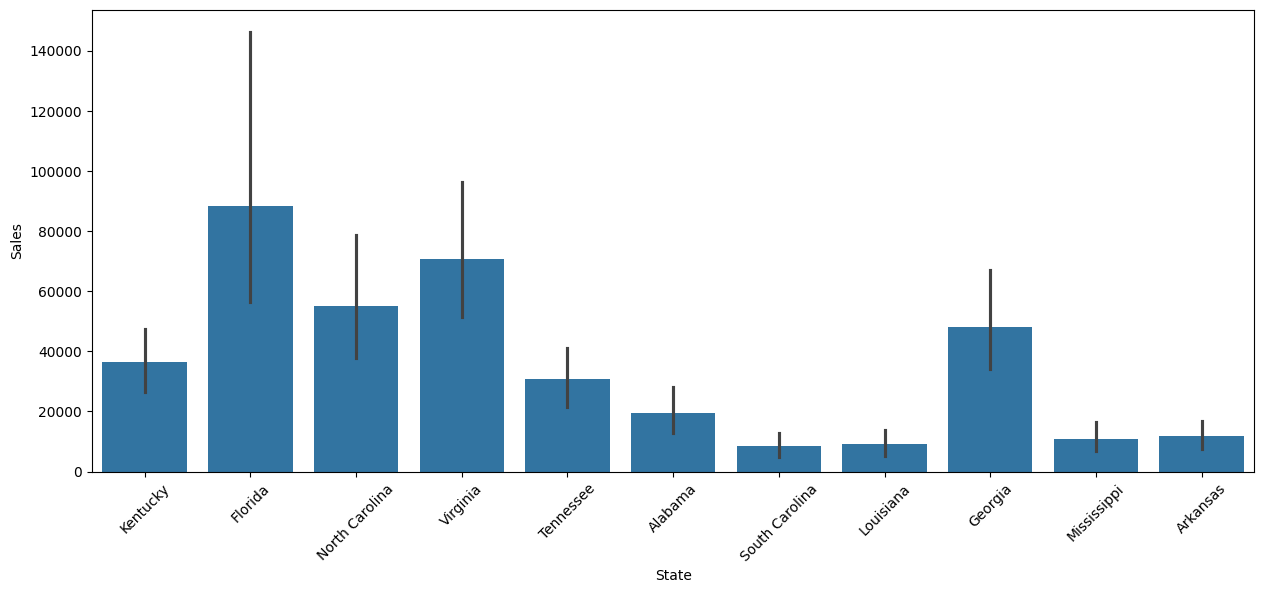

In [46]:
plt.figure(figsize = (15,6))
sns.barplot(x='State', y='Sales', data=data_south, estimator=sum)
plt.xlabel("State")
plt.xticks(rotation = 45)
plt.ylabel("Sales")

**SEGMENTATION IN FLORIDA**

In [47]:
data_flor  = data[data["State"] == "Florida"]

In [48]:
colors = sns.color_palette("crest")

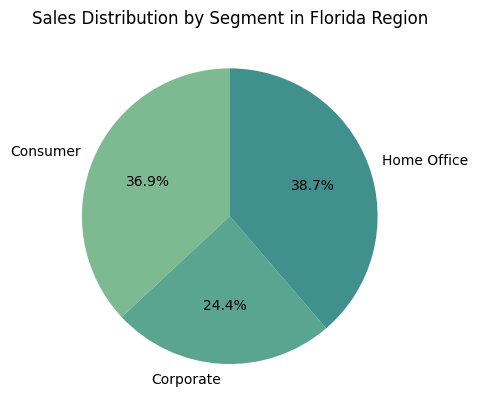

In [49]:
data_comb =  data_flor.groupby('Segment')['Sales'].sum()
plt.pie(data_comb, labels=data_comb.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sales Distribution by Segment in Florida Region')
plt.show()

**Sales distribution on Consumer, Corporate and Home Office Category in Florida**

In [50]:
data_f_segment_con= data[(data['State'] == 'Florida') & (data['Segment'] == 'Consumer')]
data_f_segment_cor= data[(data['State'] == 'Florida') & (data['Segment'] == 'Corporate')]
data_f_segment_ho= data[(data['State'] == 'Florida') & (data['Segment'] == 'Home Office')]

<ipython-input-51-e68c255e0aaa>:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.violinplot(ax = axes[0],x = data_f_segment_con["Category"] , y=data_f_segment_con["Sales"], hue = data_f_segment_con["Category"], palette=colors)
<ipython-input-51-e68c255e0aaa>:7: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.violinplot(ax = axes[1], x = data_f_segment_cor["Category"] , y=data_f_segment_cor["Sales"], hue = data_f_segment_cor["Category"], palette=colors)
<ipython-input-51-e68c255e0aaa>:12: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.violinplot(ax= axes[2],x = data_f_segment_ho["Category"] , y=data_f_segment_ho["Sales"], hue = data_f_segment_ho["Category"], palette=colors)


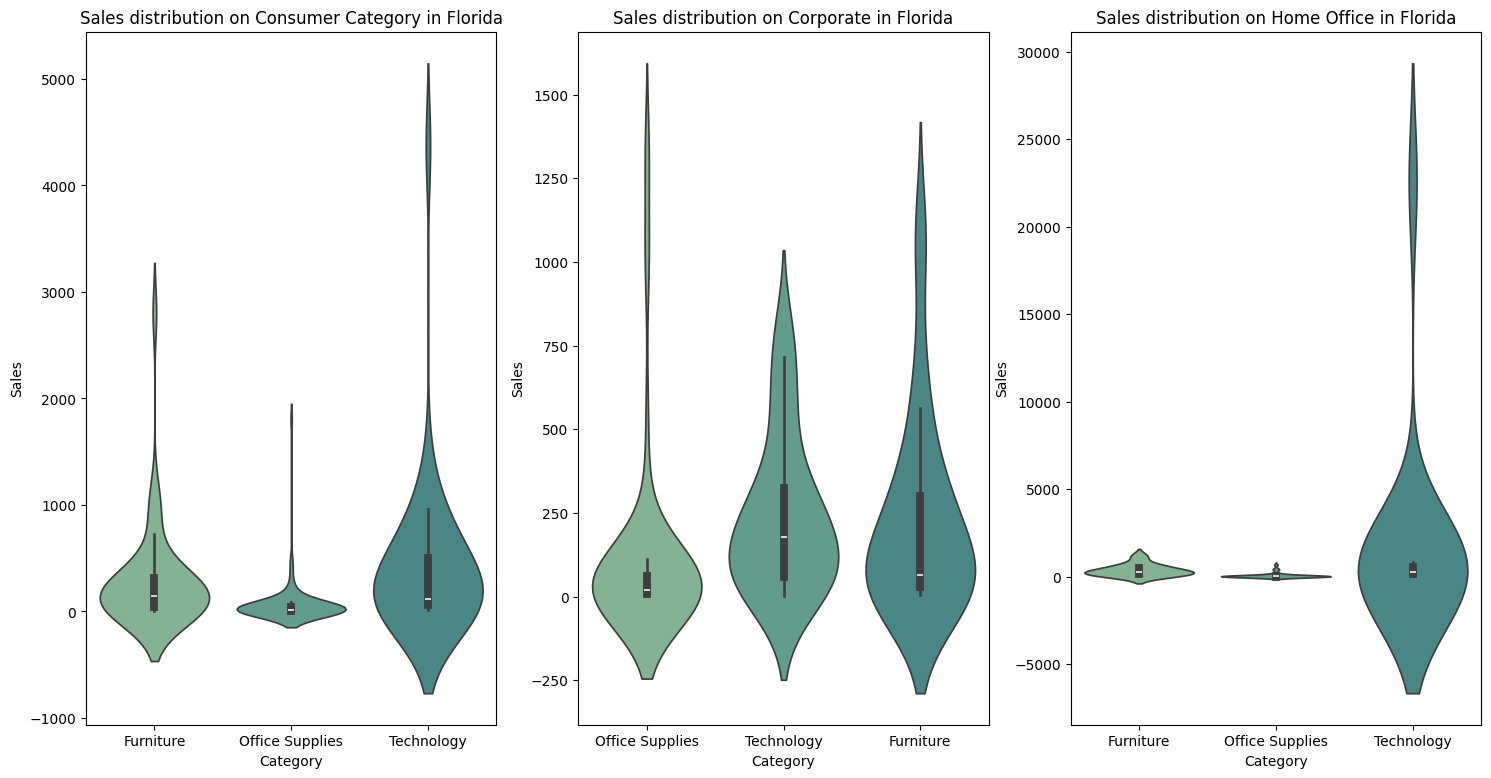

In [51]:

fig, axes = plt.subplots(1,3,figsize = (18,9))
sns.violinplot(ax = axes[0],x = data_f_segment_con["Category"] , y=data_f_segment_con["Sales"], hue = data_f_segment_con["Category"], palette=colors)
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Sales")
axes[0].set_title("Sales distribution on Consumer Category in Florida")

sns.violinplot(ax = axes[1], x = data_f_segment_cor["Category"] , y=data_f_segment_cor["Sales"], hue = data_f_segment_cor["Category"], palette=colors)
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Sales")
axes[1].set_title("Sales distribution on Corporate in Florida")

sns.violinplot(ax= axes[2],x = data_f_segment_ho["Category"] , y=data_f_segment_ho["Sales"], hue = data_f_segment_ho["Category"], palette=colors)
axes[2].set_xlabel("Category")
axes[2].set_ylabel("Sales")
axes[2].set_title("Sales distribution on Home Office in Florida")
plt.show()

# **SEGMENTATION IN SOUTH CAROLINA**

In [52]:
data_sc  = data[data["State"] == "South Carolina"]

In [53]:
colors = sns.color_palette("plasma")

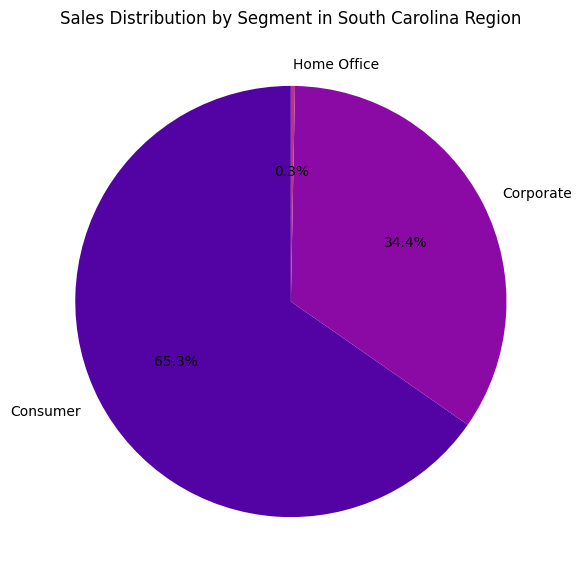

In [54]:
plt.figure(figsize = (15,7))
data_comb =  data_sc.groupby('Segment')['Sales'].sum()
plt.pie(data_comb, labels=data_comb.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sales Distribution by Segment in South Carolina Region')
plt.show()

**Sales distribution on Consumers in South Carolina**

In [55]:
data_sc_segment_con= data[(data['State'] == 'South Carolina') & (data['Segment'] == 'Consumer')]
data_sc_segment_cor= data[(data['State'] == 'South Carolina') & (data['Segment'] == 'Corporate')]
data_sc_segment_ho= data[(data['State'] == 'South Carolina') & (data['Segment'] == 'Home Office')]

<ipython-input-56-5133b300f925>:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.violinplot(ax = axes[0],x = data_sc_segment_con["Category"] , y=data_sc_segment_con["Sales"], hue = data_sc_segment_con["Category"], palette=colors)
<ipython-input-56-5133b300f925>:7: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.violinplot(ax= axes[1],x = data_sc_segment_cor["Category"] , y=data_sc_segment_cor["Sales"], hue = data_sc_segment_cor["Category"], palette=colors)
<ipython-input-56-5133b300f925>:12: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.violinplot(ax = axes[2],x = data_sc_segment_ho["Category"] , y=data_sc_segment_ho["Sales"], hue = data_sc_segment_ho["Category"], palette=colors)


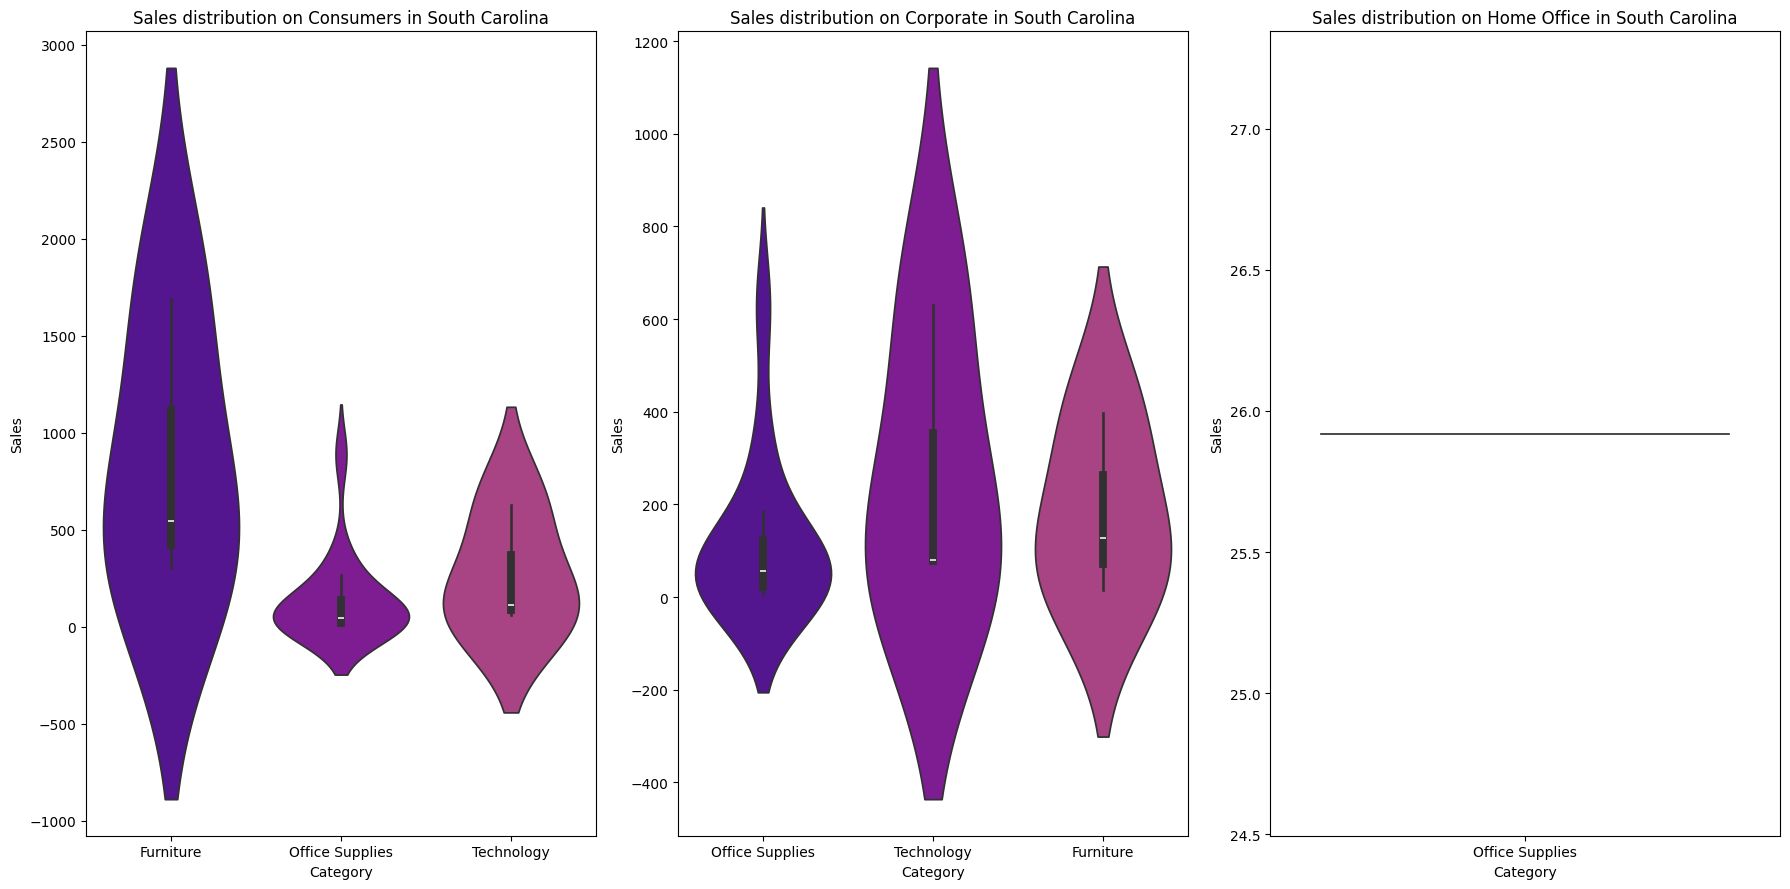

In [56]:
fig, axes = plt.subplots(1,3,figsize = (18,9))
sns.violinplot(ax = axes[0],x = data_sc_segment_con["Category"] , y=data_sc_segment_con["Sales"], hue = data_sc_segment_con["Category"], palette=colors)
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Sales")
axes[0].set_title("Sales distribution on Consumers in South Carolina")

sns.violinplot(ax= axes[1],x = data_sc_segment_cor["Category"] , y=data_sc_segment_cor["Sales"], hue = data_sc_segment_cor["Category"], palette=colors)
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Sales")
axes[1].set_title("Sales distribution on Corporate in South Carolina")

sns.violinplot(ax = axes[2],x = data_sc_segment_ho["Category"] , y=data_sc_segment_ho["Sales"], hue = data_sc_segment_ho["Category"], palette=colors)
axes[2].set_xlabel("Category")
axes[2].set_ylabel("Sales")
axes[2].set_title("Sales distribution on Home Office in South Carolina")

plt.tight_layout()
plt.show()
